In [14]:
import keras
import gpflow
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


In [12]:
#reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [4]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [9]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Fit the model
history = model.fit(x_train, y_train, validation_split=0.20, epochs=10, batch_size=128, verbose=1)
# list all data in history
print(history.history.keys())

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 157s 3ms/step - loss: 1.6142 - acc: 0.8601 - val_loss: 0.0915 - val_acc: 0.9714
Epoch 2/10
48000/48000 [==============================] - 143s 3ms/step - loss: 0.0673 - acc: 0.9794 - val_loss: 0.0813 - val_acc: 0.9772
Epoch 3/10
48000/48000 [==============================] - 142s 3ms/step - loss: 0.0364 - acc: 0.9885 - val_loss: 0.0984 - val_acc: 0.9727
Epoch 4/10
48000/48000 [==============================] - 143s 3ms/step - loss: 0.0282 - acc: 0.9904 - val_loss: 0.1033 - val_acc: 0.9757
Epoch 5/10
48000/48000 [==============================] - 143s 3ms/step - loss: 0.0189 - acc: 0.9939 - val_loss: 0.1084 - val_acc: 0.9754
Epoch 6/10
48000/48000 [==============================] - 140s 3ms/step - loss: 0.0188 - acc: 0.9935 - val_loss: 0.1294 - val_acc: 0.9723
Epoch 7/10
48000/48000 [==============================] - 139s 3ms/step - loss: 0.0192 - acc: 0.9942 - val_loss: 0.1220 - 

NameError: name 'plt' is not defined

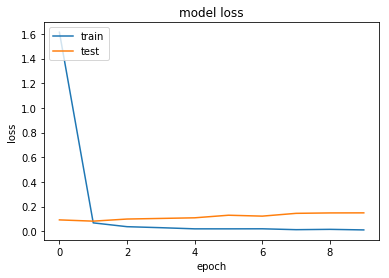

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

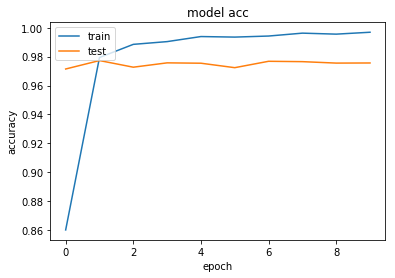

In [16]:
# summarize history for loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()